In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

# Specific Libraries
import os
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm, trange
from tqdm.auto import tqdm

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
df = pd.read_csv("../input/urbansound8k/UrbanSound8K.csv")
df.sample(5)

slice_file_name    fsID      start        end  salience  fold  \
5245  202516-0-0-10.wav  202516   5.000000   9.000000         1     7   
8130     7913-3-2-0.wav    7913   5.540695   6.329430         1    10   
7942    76091-6-5-0.wav   76091   4.485405   5.099377         1     2   
4586  186334-2-0-44.wav  186334  22.000000  26.000000         1     3   
4039  178520-2-0-27.wav  178520  13.500000  17.500000         1     2   

      classID             class  
5245        0   air_conditioner  
8130        3          dog_bark  
7942        6          gun_shot  
4586        2  children_playing  
4039        2  children_playing

In [3]:
data1, sampling_rate1 = librosa.load('/kaggle/input/urbansound8k/fold2/100652-3-0-0.wav')
data2, sampling_rate2 = librosa.load('/kaggle/input/urbansound8k/fold9/101729-0-0-1.wav')

In [4]:
ipd.Audio(data1, rate=sampling_rate1)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

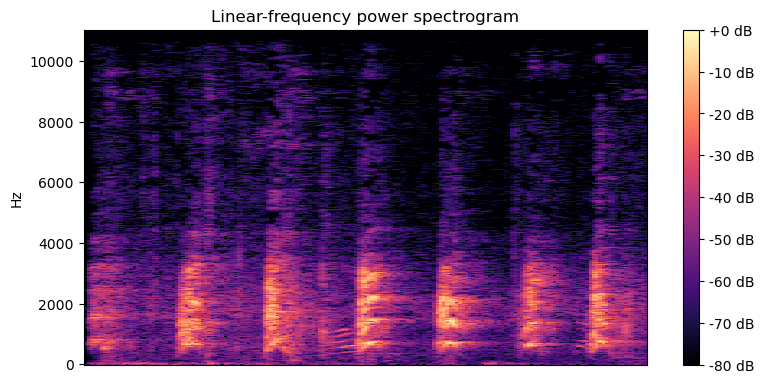

In [5]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

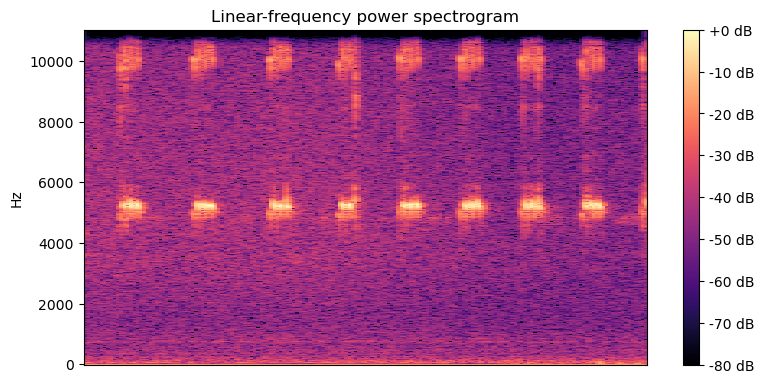

In [6]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

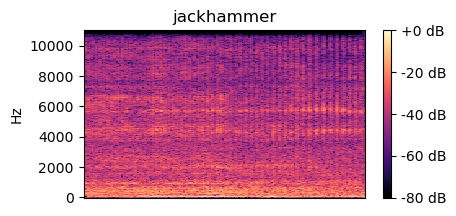

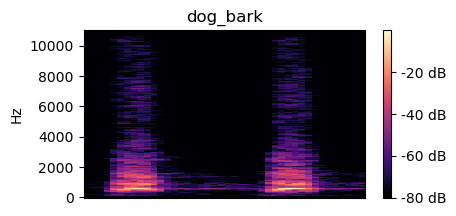

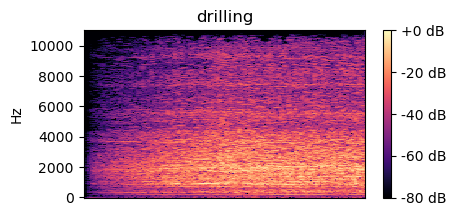

In [7]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = '../input/urbansound8k/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 10))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [8]:
def features_extract(file):
    sample,sample_rate = librosa.load(file_name)
    feature = librosa.feature.mfcc(y=sample,sr=sample_rate,n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    return scaled_feature

extracted = []
path = '/kaggle/input/urbansound8k/'

for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(path),'fold'+str(row["fold"])+'/',str(row['slice_file_name'])) 
    final_class_labels = row['class']   
    data= features_extract(file_name)    
    extracted.append([data,final_class_labels])

0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [9]:
ext_df = pd.DataFrame(extracted,columns=['feature','class'])
ext_df

feature             class
0     [-211.93698, 62.58122, -122.813156, -60.745296...          dog_bark
1     [-417.00525, 99.336624, -42.995586, 51.073326,...  children_playing
2     [-452.39316, 112.36253, -37.578075, 43.195866,...  children_playing
3     [-406.47922, 91.19661, -25.043556, 42.784523, ...  children_playing
4     [-439.63873, 103.86224, -42.658787, 50.690285,...  children_playing
...                                                 ...               ...
8727  [-391.3721, 125.362404, -40.634056, 25.899755,...          car_horn
8728  [-339.42715, 76.4091, -35.309883, 41.98404, -2...          car_horn
8729  [-297.31534, 102.09027, -36.75108, 26.81649, -...          car_horn
8730  [-336.92386, 115.3139, -44.8471, 24.968985, -9...          car_horn
8731  [-307.41763, 83.30674, -25.756512, 35.44811, 4...          car_horn

[8732 rows x 2 columns]

In [10]:
x = np.array(ext_df['feature'].tolist())
y = np.array(ext_df['class'].tolist())

In [11]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("Number of training samples = ", x_train.shape[0])
print("Number of testing samples = ",x_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


In [13]:
num_labels = y.shape[1]
model = Sequential()

model.add(Dense(128, input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6528      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
model.fit(
          x_train, 
          y_train, 
          batch_size=32, 
          epochs=110,
          validation_data=(x_test, y_test),
         )

Epoch 1/110
219/219 [==============================] - 10s 7ms/step - loss: 10.0631 - accuracy: 0.1497 - val_loss: 2.1873 - val_accuracy: 0.1723
Epoch 2/110
219/219 [==============================] - 1s 5ms/step - loss: 2.5005 - accuracy: 0.1888 - val_loss: 2.2247 - val_accuracy: 0.1488
Epoch 3/110
219/219 [==============================] - 1s 5ms/step - loss: 2.1829 - accuracy: 0.2215 - val_loss: 2.1221 - val_accuracy: 0.1803
Epoch 4/110
219/219 [==============================] - 1s 5ms/step - loss: 2.0466 - accuracy: 0.2653 - val_loss: 2.0222 - val_accuracy: 0.2015
Epoch 5/110
219/219 [==============================] - 1s 5ms/step - loss: 1.9463 - accuracy: 0.3048 - val_loss: 1.8583 - val_accuracy: 0.2662
Epoch 6/110
219/219 [==============================] - 1s 5ms/step - loss: 1.8483 - accuracy: 0.3465 - val_loss: 1.7430 - val_accuracy: 0.3263
Epoch 7/110
219/219 [==============================] - 1s 5ms/step - loss: 1.7688 - accuracy: 0.3742 - val_loss: 1.6500 - val_accuracy: 0.38

In [16]:
predictions = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print(score)

55/55 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.8414
[0.5515278577804565, 0.8414424657821655]


In [17]:
def extract_feature(file_name):
    audio_date, sample_rate = librosa.load(file_name)
    fea = librosa.feature.mfcc(y=audio_date,sr=sample_rate,n_mfcc=50)
    scaled = np.mean(fea.T,axis=0)
    return np.array([scaled])

def print_prediction(file_name):
    pred_fea = extract_feature(file_name) 
    pred_vector = np.argmax(model.predict(pred_fea), axis=-1)
    pred_class = le.inverse_transform(pred_vector)
    print("The predicted class is:", pred_class[0], '\n')

In [18]:
print_prediction('../input/urbansound8k/fold7/102853-8-0-2.wav')
ipd.Audio('../input/urbansound8k/fold7/102853-8-0-2.wav')

1/1 [==============================] - 0s 50ms/step
The predicted class is: siren 



In [19]:
print_prediction('../input/urbansound8k/fold2/100652-3-0-2.wav')
ipd.Audio('../input/urbansound8k/fold2/100652-3-0-2.wav')

1/1 [==============================] - 0s 50ms/step
The predicted class is: dog_bark 



In [20]:
print_prediction('../input/urbansound8k/fold1/103074-7-1-1.wav')
ipd.Audio('../input/urbansound8k/fold1/103074-7-1-1.wav')

1/1 [==============================] - 0s 43ms/step
The predicted class is: jackhammer 

